In [2]:
import pandas as pd

filename = 'gd1_candidates.hdf5'
candidate_df = pd.read_hdf(filename, 'candidate_df')

In [4]:
from astropy.table import Table

candidate_table = Table.from_pandas(candidate_df)
type(candidate_table)

astropy.table.table.Table

In [5]:
table = candidate_table[['source_id']]
table.write('candidate_df.xml', format='votable', overwrite=True)

In [17]:
query = """SELECT *
FROM gaiadr2.panstarrs1_best_neighbour as best
JOIN tap_upload.candidate_df as candidate_df
ON best.source_id = candidate_df.source_id
"""

In [18]:
from astroquery.gaia import Gaia

job = Gaia.launch_job_async(query=query, 
                            upload_resource='candidate_df.xml', 
                            upload_table_name='candidate_df')

INFO: Query finished. [astroquery.utils.tap.core]


In [19]:
results = job.get_results()
results

source_id,original_ext_source_id,angular_distance,number_of_neighbours,number_of_mates,best_neighbour_multiplicity,gaia_astrometric_params,source_id_2
,,arcsec,,,,,
int64,int64,float64,int32,int16,int16,int16,int64
635860218726658176,130911385187671349,0.053667035895467084,1,0,1,5,635860218726658176
635674126383965568,130831388428488720,0.038810268141577516,1,0,1,5,635674126383965568
635535454774983040,130631378377657369,0.034323028828991076,1,0,1,5,635535454774983040
635497276810313600,130811380445631930,0.04720255413250006,1,0,1,5,635497276810313600
635614168640132864,130571395922140135,0.020304189709964143,1,0,1,5,635614168640132864
635598607974369792,130341392091279513,0.036524626853403054,1,0,1,5,635598607974369792
635737661835496576,131001399333502136,0.036626827820716606,1,0,1,5,635737661835496576
635850945892748672,132011398654934147,0.021178742393378396,1,0,1,5,635850945892748672


In [21]:
table_ext = results[['source_id', 'original_ext_source_id']]
table_ext.write('external.xml', format='votable', overwrite=True)

In [22]:
query2 = """SELECT
external.source_id, ps.g_mean_psf_mag, ps.i_mean_psf_mag
FROM gaiadr2.panstarrs1_original_valid as ps
JOIN tap_upload.external as external
ON ps.obj_id = external.original_ext_source_id
"""

In [23]:
job2 = Gaia.launch_job_async(query=query2, 
                       upload_resource='external.xml', 
                       upload_table_name='external')

INFO: Query finished. [astroquery.utils.tap.core]


In [26]:
results2 = job2.get_results()
results2

source_id,g_mean_psf_mag,i_mean_psf_mag
,,mag
int64,float64,float64
635860218726658176,17.8978004455566,17.5174007415771
635674126383965568,19.2873001098633,17.6781005859375
635535454774983040,16.9237995147705,16.478099822998
635497276810313600,19.9242000579834,18.3339996337891
635614168640132864,16.1515998840332,14.6662998199463
635598607974369792,16.5223999023438,16.1375007629395
635737661835496576,14.5032997131348,13.9849004745483
635850945892748672,16.5174999237061,16.0450000762939


In [27]:
filename = 'gd1_photo.fits'
results2.write(filename, overwrite=True)

In [28]:
from astropy.table import Table

photo_table = Table.read(filename)

In [29]:
len(photo_table)

3724

In [30]:
photo_table

source_id,g_mean_psf_mag,i_mean_psf_mag
,,mag
int64,float64,float64
635860218726658176,17.8978004455566,17.5174007415771
635674126383965568,19.2873001098633,17.6781005859375
635535454774983040,16.9237995147705,16.478099822998
635497276810313600,19.9242000579834,18.3339996337891
635614168640132864,16.1515998840332,14.6662998199463
635598607974369792,16.5223999023438,16.1375007629395
635737661835496576,14.5032997131348,13.9849004745483
635850945892748672,16.5174999237061,16.0450000762939


In [39]:
pd.Series(x).describe()

count    3.724000e+03
mean     1.745435e+18
std      1.369887e+19
min     -1.000000e+20
25%      5.536747e-01
50%      9.077005e-01
75%      1.603075e+00
max      1.000000e+20
dtype: float64

In [48]:
import matplotlib.pyplot as plt

def plot_cmd(photo_table):
    y = photo_table['g_mean_psf_mag']
    x = photo_table['g_mean_psf_mag'] - photo_table['i_mean_psf_mag']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlim(0, 1.5)
    plt.ylim(14, 22)

    plt.gca().invert_yaxis()

    plt.ylabel(r'$g_0$')
    plt.xlabel(r'$(g-i)_0$');

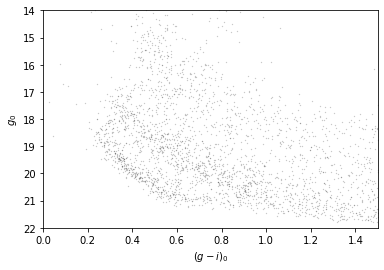

In [49]:
plot_cmd(photo_table)

In [53]:
import matplotlib as mpl

mpl.get_backend()

'module://ipykernel.pylab.backend_inline'

In [55]:
mpl.rcParams['backend']

'module://ipykernel.pylab.backend_inline'

In [ ]:
import matplotlib as mpl

# NOTE: Don't do this.  

mpl.use('TkAgg')
plot_cmd(photo_table)
coords = plt.ginput(10)

In [71]:
mpl.use('agg')

In [72]:
coords = [(0.2643369175627239, 17.84253127299485),
 (0.3539426523297491, 18.799116997792495),
 (0.47491039426523296, 19.682119205298015),
 (0.6317204301075269, 20.454746136865342),
 (0.7661290322580645, 20.785871964679913),
 (0.8064516129032258, 21.41133186166299),
 (0.5869175627240143, 21.300956585724798),
 (0.39426523297491034, 20.565121412803535),
 (0.22401433691756267, 19.240618101545255),
 (0.19713261648745517, 18.02649006622517)]

In [73]:
coords

[(0.2643369175627239, 17.84253127299485),
 (0.3539426523297491, 18.799116997792495),
 (0.47491039426523296, 19.682119205298015),
 (0.6317204301075269, 20.454746136865342),
 (0.7661290322580645, 20.785871964679913),
 (0.8064516129032258, 21.41133186166299),
 (0.5869175627240143, 21.300956585724798),
 (0.39426523297491034, 20.565121412803535),
 (0.22401433691756267, 19.240618101545255),
 (0.19713261648745517, 18.02649006622517)]

In [74]:
import numpy as np

xs, ys = np.transpose(coords)

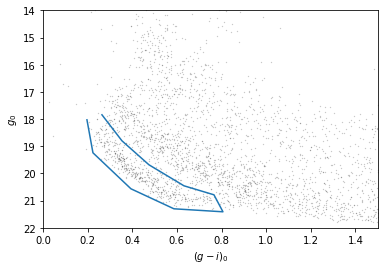

In [76]:
plot_cmd(photo_table)
plt.plot(xs, ys);

In [80]:
from matplotlib.path import Path

path = Path(coords)

In [81]:
points = [(0.4, 20), (0.4, 16)]

In [82]:
path.contains_points(points)

array([ True, False])